#Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install wordcloud

In [ ]:
!unzip news.zip

Archive:  news.zip
replace news.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: news.csv                


##Dataset

In [ ]:
dataset = pd.read_csv('news.csv')
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
dataset.shape

(6335, 4)

Importing other required libraries

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Removing stopwords from datset

In [ ]:
corpus = []
ps = PorterStemmer()
for i in range(0,3000):
  news = re.sub('[^^a-zA-Z0-9]',' ',str(dataset['text'][i]))
  news = news.lower()
  news = news.split()
  news = [ps.stem(word) for word in news if len(news)<=2 or not word in set(stopwords.words('english'))]
  news = ' '.join(news)
  corpus.append(news)

In [ ]:
corpus2 = []
for i in range(0,3000):
  news = re.sub('[^^a-zA-Z0-9]',' ',str(dataset['title'][i]))
  news = news.lower()
  news = news.split()
  news = [ps.stem(word) for word in news if len(news)<=2 or not word in set(stopwords.words('english'))]
  news = ' '.join(news)
  corpus2.append(news)

## WordCloud visualization (Most Frequent words)

In [ ]:
textVisualiseTitle = ""
textVisualiseText = ""
for word in corpus:
  textVisualiseText = textVisualiseText + word
for word in corpus2:
  textVisualiseTitle = textVisualiseTitle + word

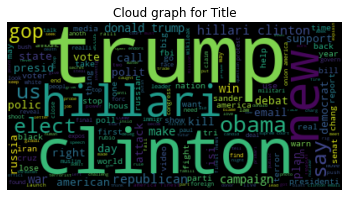

In [ ]:
from wordcloud import WordCloud
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(textVisualiseTitle)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Cloud graph for Title")
plt.show()

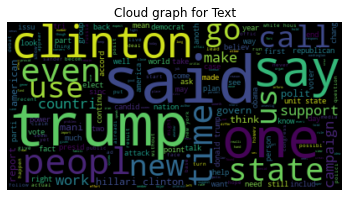

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(textVisualiseText)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Cloud graph for Text")
plt.show()

##Creating bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(corpus)
# summarize
print(vectorizer.vocabulary_)
# encode document
news_body = vectorizer.transform(corpus).todense()
# summarize encoded vector
print(news_body.shape)
print(type(news_body))

In [ ]:
# tokenize and build vocab
vectorizer.fit(corpus2)
# summarize
print(vectorizer.vocabulary_)
# encode document
news_title = vectorizer.transform(corpus2).todense()
# summarize encoded vector
print(news_title.shape)
print(type(news_title))

In [ ]:
final_vector = np.hstack((news_title,news_body))
features = final_vector
features.shape

(3000, 37533)

In [ ]:
y = dataset.iloc[:3000,-1].values

##Splitting dataset into train and test 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,y,test_size = 0.25,random_state = 13)

#Support Vector Machine 

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='sigmoid')
svm_clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_clf.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['REAL' 'REAL']
 ['REAL' 'REAL']
 ['FAKE' 'REAL']
 ...
 ['REAL' 'FAKE']
 ['FAKE' 'FAKE']
 ['REAL' 'REAL']]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))

[[290  86]
 [ 89 285]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.77      0.77      0.77       376
        REAL       0.77      0.76      0.77       374

    accuracy                           0.77       750
   macro avg       0.77      0.77      0.77       750
weighted avg       0.77      0.77      0.77       750



In [ ]:
np.set_printoptions(precision=2)
print(accuracy_score(y_test,y_pred)*100)

76.66666666666667


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dclassifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred = Dclassifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['REAL' 'REAL']
 ['REAL' 'REAL']
 ['REAL' 'REAL']
 ...
 ['REAL' 'FAKE']
 ['FAKE' 'FAKE']
 ['REAL' 'REAL']]


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[304  72]
 [ 82 292]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.79      0.81      0.80       376
        REAL       0.80      0.78      0.79       374

    accuracy                           0.79       750
   macro avg       0.79      0.79      0.79       750
weighted avg       0.79      0.79      0.79       750



In [ ]:
np.set_printoptions(precision=2)
print(accuracy_score(y_test,y_pred)*100)

79.46666666666667


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rclassifier = RandomForestClassifier(n_estimators = 65, criterion = 'entropy', random_state = 0)
Rclassifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=65,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = Rclassifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['REAL' 'REAL']
 ['REAL' 'REAL']
 ['REAL' 'REAL']
 ...
 ['REAL' 'FAKE']
 ['FAKE' 'FAKE']
 ['REAL' 'REAL']]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))

[[334  42]
 [ 55 319]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.86      0.89      0.87       376
        REAL       0.88      0.85      0.87       374

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



In [ ]:
np.set_printoptions(precision=2)
print(accuracy_score(y_test,y_pred)*100)

87.06666666666666


###Fake prediction

In [ ]:
text = '''
"House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this weekâ€“FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clintonâ€™s email server, the ranking Democrats on the relevant committees didnâ€™t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation."" Case reopened 
â€” Jason Chaffetz (@jasoninthehouse) October 28, 2016 
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of â€œan unrelated caseâ€â€“which we now know to be Anthony Weinerâ€™s sexting with a teenager. But apparently such little things as facts didnâ€™t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary winsâ€“at least two yearsâ€™ worth, and possibly an entire termâ€™s worth of them. Apparently Chaffetz thought the FBI was already doing his work for himâ€“resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetzâ€™ sins. That aide told Shareblue that his boss and other Democrats didnâ€™t even know about Comeyâ€™s letter at the timeâ€“and only found out when they checked Twitter. â€œDemocratic Ranking Members on the relevant committees didnâ€™t receive Comeyâ€™s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didnâ€™ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.â€ 
So letâ€™s see if weâ€™ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. 
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. 
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didnâ€™t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesnâ€™t trample on basic standards of fairness, I donâ€™t know what does. 
Granted, itâ€™s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetzâ€™ planned fishing expedition. But that doesnâ€™t mean we canâ€™t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus 
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect"

'''
title = '''
House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It
'''


In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = Rclassifier.predict(final_X_test)
print(new_y_pred)

['FAKE']


###Real Prediction

In [ ]:
text = '''
Donald J. Trump is scheduled to make a highly anticipated visit to an   church in Detroit on Saturday, the first such visit of his campaign. There, he will participate in a    session conducted by Bishop Wayne T. Jackson of the church, Great Faith Ministries International. Given the importance of the visit, the Trump team went so far as to script Mr. Trumpâ€™s answers to Bishop Jacksonâ€™s questions, which were submitted in advance. After this article was published on Thursday night, a campaign official said that Mr. Trump would also speak to the churchâ€™s congregation and then tour some neighborhoods with Ben Carson, a former presidential candidate and Detroit native. Below are excerpts from a draft of the script that was obtained by The New York Times. _____ Mr. Trump there is racial divide in our country and it is evident that the tension is boiling over. Case and point Reverend Pinckney in South Carolina was gunned down when a white young man came into their Bible Study and slaughtered the Reverend and eight other individuals because he wanted to start a race war. What would your administration do to bring down the racial tension that is in our Country? In the Bible Jesus said that a house divided cannot stand. Our best hope for erasing racial tensions in America is to work toward a   society. In business, we hire, retain and award based on merit. In society, however, we have divisions that can only be eliminated if we have equal opportunity and then equal access to programs and institutions that will lift all people in the country. We have to reform our tax system so that we can spur economic growth for the long haul. We have to have stronger enforcement of immigration laws. We have to renegotiate our trade deals so that we can bring advantage back to the American workforce. But perhaps most important is that we must provide equal opportunity for a quality education for all Americans. The higher the educational attainment, the greater the likelihood one can climb the economic ladder. We must bring school choice programs to our cities and we must get rid of Common Core. We must make sure that access, affordability and accountability are brought into our higher education system. Without a focus on educational outcomes for every American, we will perpetuate the permanent underclass that progressive policies have sustained. Republicans like me need to have the courage to speak the truth about where we are and what has to be done. We have to have the courage to go into communities and work with everyone there to make sure that our schools are good and that our children have access to the whatever educational situation they may need. This is not something one person can do, but it is something that we can do together. _____ Mr. Trump there is a perception that your administration is racist. With many of the African American voters their belief is that the Republican Party as a whole does not cater to African American needs. In 2008 and 2012 we had two Republican Candidates John McCain and Mitt Romney and neither one of them came to Detroit, or any urban area that I can remember to even address the concerns of our community. First I would like to commend you for coming to our community as a Republican Candidate. Second I need to know how would you change that perception in our community? The proof, as they say, will be in the pudding. Coming into a community is meaningless unless we can offer an alternative to the horrible progressive agenda that has perpetuated a permanent underclass in America. We need to be true to our word and offer all Americans more opportunities so that each and every one of them can reach their full potential. This means economic policies that will bring jobs back to America and will raise wages for all. This means working hard to provide as many educational options as possible to our parents and children. This means cleaning up drugs and making our neighborhoods and communities safer. We need to get people off welfare and back to work. We need to make sure that anyone who qualifies can go into a bank, get a loan and then start a business. We need to reduce regulations and expand options for people who want to be independent of government. We need to make sure that people can worship how they want and where they want without worrying that some federal agency is going to threaten the religious liberties. Republicans have better options. We just need to have the courage to present them with conviction. _____ Mr. Trump what is your vision for America? And specifically Black America? If you repeal Obama care what is your plan to provide health care and medicine to those who canâ€™t afford it, yet need it the most? As President, I must serve all Americans without regard to race, ethnicity or any other qualification. I must approach my task with the utmost wisdom and make sure that all Americans have opportunities to achieve to their potential. If we are to Make America Great Again, we must reduce, rather than highlight, issues of race in this country. I want to make race disappear as a factor in government and governance. Every individual, regardless of race or ethnicity, must have access to the full array of opportunities in America. My vision for America is that every citizen and legal resident of this nation will be able to stand side by side and be proud of the fact that they live in the greatest nation on earth. As for the Affordable Care Act, I will work to repeal the act and replace it with market driven solutions that will offer more access to healthcare at more affordable prices. Every American should be able to purchase health insurance across state lines, have health savings account that belong to them, have price transparency so they can shop for the best services at the best prices and know that they will not have to compete with those who are clogging the system simply because they are in this country illegally. We want to block grant Medicaid so that states can provide services closer to the people. We want to make sure that every American has great economic opportunity so that they can seek out their own health insurance and still be able to afford it. This approach will serve all Americans and will ensure that more Americans are covered by better insurance and healthcare options. _____ Mr. Trump I am a registered Democrat but I am an undecided voter in this election for 2016. It is not only myself but there has been a lot of Pastors and African Americans who have not made up their minds concerning who they are going to cast their vote for. The latest polls indicate that you have 1 percent of the African American vote. What can you say to undecided voters such as myself and others in the African American Community that will win our vote on November 8, 2016? And beyond winning, why is the African American vote important to you? All votes are important to me and my campaign. Your vote, your neighborâ€™s vote, the vote of every American is critical and I must do all I can to make sure you know that if you vote for me, you are voting for a stronger, more vibrant America. My policies offer you a clear choice. You can continue down the road of progressivism that has created a permanent underclass in this country that, unfortunately, includes far too many people of color. If you want a better America, you must break from the historical hold that Democrats have had on people of color and move to options that allow you to achieve your potential. This is all about opportunity  â€”   not   outcomes and promises of things to come that never materialize. The progressives have worked tirelessly to bring all Americans down to one level rather than allowing as many as possible to rise as high as possible. Education, jobs, religious liberty and protection of civil rights are the promises that I will keep, not just utter to gain favor. If you are interested in a greater America with more opportunity, liberty and prosperity, you must take a chance and walk over to my side. If you want a strong partner in this journey, you will vote for me. I will never let you down. By the way, my support is now up to 8% and climbing.
'''

title = '''
Excepts From a Draft Script for Donald Trumpâ€™s Q&ampA With a Black Churchâ€™s Pastor - The New York Times
'''

In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = Rclassifier.predict(final_X_test)
print(new_y_pred)

['REAL']


###Hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
    "n_estimators":[0,20,40,50]
}

In [ ]:
clf_grid_Random = GridSearchCV(estimator=Rclassifier,param_grid=param,cv=3,n_jobs=-1)
clf_grid_Random.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=65, n_jobs=None,
                                              oob_score=False, ran

In [ ]:
clf_grid_Random.best_params_

{'n_estimators': 50}

In [ ]:
hyper_pred = clf_grid_Random.predict(x_test)
print(np.concatenate((hyper_pred.reshape(len(hyper_pred),1), y_test.reshape(len(y_test),1)),1))

[['REAL' 'REAL']
 ['REAL' 'REAL']
 ['REAL' 'REAL']
 ...
 ['REAL' 'FAKE']
 ['FAKE' 'FAKE']
 ['REAL' 'REAL']]


In [ ]:
print(confusion_matrix(y_test,hyper_pred))

[[339  37]
 [ 61 313]]


In [ ]:
print(classification_report(y_test,hyper_pred))

              precision    recall  f1-score   support

        FAKE       0.85      0.90      0.87       376
        REAL       0.89      0.84      0.86       374

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



In [ ]:
np.set_printoptions(precision=2)
print(accuracy_score(y_test,hyper_pred)*100)

86.93333333333332


###Fake News Prediction

In [ ]:
text = '''
"House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this weekâ€“FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clintonâ€™s email server, the ranking Democrats on the relevant committees didnâ€™t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation."" Case reopened 
â€” Jason Chaffetz (@jasoninthehouse) October 28, 2016 
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of â€œan unrelated caseâ€â€“which we now know to be Anthony Weinerâ€™s sexting with a teenager. But apparently such little things as facts didnâ€™t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary winsâ€“at least two yearsâ€™ worth, and possibly an entire termâ€™s worth of them. Apparently Chaffetz thought the FBI was already doing his work for himâ€“resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetzâ€™ sins. That aide told Shareblue that his boss and other Democrats didnâ€™t even know about Comeyâ€™s letter at the timeâ€“and only found out when they checked Twitter. â€œDemocratic Ranking Members on the relevant committees didnâ€™t receive Comeyâ€™s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didnâ€™ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.â€ 
So letâ€™s see if weâ€™ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. 
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. 
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didnâ€™t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesnâ€™t trample on basic standards of fairness, I donâ€™t know what does. 
Granted, itâ€™s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetzâ€™ planned fishing expedition. But that doesnâ€™t mean we canâ€™t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus 
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect"

'''
title = '''
House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It
'''


In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = clf_grid_Random.predict(final_X_test)
print(new_y_pred)

['FAKE']


###Real News *Prediction*

In [ ]:
text = '''
Donald J. Trump is scheduled to make a highly anticipated visit to an   church in Detroit on Saturday, the first such visit of his campaign. There, he will participate in a    session conducted by Bishop Wayne T. Jackson of the church, Great Faith Ministries International. Given the importance of the visit, the Trump team went so far as to script Mr. Trumpâ€™s answers to Bishop Jacksonâ€™s questions, which were submitted in advance. After this article was published on Thursday night, a campaign official said that Mr. Trump would also speak to the churchâ€™s congregation and then tour some neighborhoods with Ben Carson, a former presidential candidate and Detroit native. Below are excerpts from a draft of the script that was obtained by The New York Times. _____ Mr. Trump there is racial divide in our country and it is evident that the tension is boiling over. Case and point Reverend Pinckney in South Carolina was gunned down when a white young man came into their Bible Study and slaughtered the Reverend and eight other individuals because he wanted to start a race war. What would your administration do to bring down the racial tension that is in our Country? In the Bible Jesus said that a house divided cannot stand. Our best hope for erasing racial tensions in America is to work toward a   society. In business, we hire, retain and award based on merit. In society, however, we have divisions that can only be eliminated if we have equal opportunity and then equal access to programs and institutions that will lift all people in the country. We have to reform our tax system so that we can spur economic growth for the long haul. We have to have stronger enforcement of immigration laws. We have to renegotiate our trade deals so that we can bring advantage back to the American workforce. But perhaps most important is that we must provide equal opportunity for a quality education for all Americans. The higher the educational attainment, the greater the likelihood one can climb the economic ladder. We must bring school choice programs to our cities and we must get rid of Common Core. We must make sure that access, affordability and accountability are brought into our higher education system. Without a focus on educational outcomes for every American, we will perpetuate the permanent underclass that progressive policies have sustained. Republicans like me need to have the courage to speak the truth about where we are and what has to be done. We have to have the courage to go into communities and work with everyone there to make sure that our schools are good and that our children have access to the whatever educational situation they may need. This is not something one person can do, but it is something that we can do together. _____ Mr. Trump there is a perception that your administration is racist. With many of the African American voters their belief is that the Republican Party as a whole does not cater to African American needs. In 2008 and 2012 we had two Republican Candidates John McCain and Mitt Romney and neither one of them came to Detroit, or any urban area that I can remember to even address the concerns of our community. First I would like to commend you for coming to our community as a Republican Candidate. Second I need to know how would you change that perception in our community? The proof, as they say, will be in the pudding. Coming into a community is meaningless unless we can offer an alternative to the horrible progressive agenda that has perpetuated a permanent underclass in America. We need to be true to our word and offer all Americans more opportunities so that each and every one of them can reach their full potential. This means economic policies that will bring jobs back to America and will raise wages for all. This means working hard to provide as many educational options as possible to our parents and children. This means cleaning up drugs and making our neighborhoods and communities safer. We need to get people off welfare and back to work. We need to make sure that anyone who qualifies can go into a bank, get a loan and then start a business. We need to reduce regulations and expand options for people who want to be independent of government. We need to make sure that people can worship how they want and where they want without worrying that some federal agency is going to threaten the religious liberties. Republicans have better options. We just need to have the courage to present them with conviction. _____ Mr. Trump what is your vision for America? And specifically Black America? If you repeal Obama care what is your plan to provide health care and medicine to those who canâ€™t afford it, yet need it the most? As President, I must serve all Americans without regard to race, ethnicity or any other qualification. I must approach my task with the utmost wisdom and make sure that all Americans have opportunities to achieve to their potential. If we are to Make America Great Again, we must reduce, rather than highlight, issues of race in this country. I want to make race disappear as a factor in government and governance. Every individual, regardless of race or ethnicity, must have access to the full array of opportunities in America. My vision for America is that every citizen and legal resident of this nation will be able to stand side by side and be proud of the fact that they live in the greatest nation on earth. As for the Affordable Care Act, I will work to repeal the act and replace it with market driven solutions that will offer more access to healthcare at more affordable prices. Every American should be able to purchase health insurance across state lines, have health savings account that belong to them, have price transparency so they can shop for the best services at the best prices and know that they will not have to compete with those who are clogging the system simply because they are in this country illegally. We want to block grant Medicaid so that states can provide services closer to the people. We want to make sure that every American has great economic opportunity so that they can seek out their own health insurance and still be able to afford it. This approach will serve all Americans and will ensure that more Americans are covered by better insurance and healthcare options. _____ Mr. Trump I am a registered Democrat but I am an undecided voter in this election for 2016. It is not only myself but there has been a lot of Pastors and African Americans who have not made up their minds concerning who they are going to cast their vote for. The latest polls indicate that you have 1 percent of the African American vote. What can you say to undecided voters such as myself and others in the African American Community that will win our vote on November 8, 2016? And beyond winning, why is the African American vote important to you? All votes are important to me and my campaign. Your vote, your neighborâ€™s vote, the vote of every American is critical and I must do all I can to make sure you know that if you vote for me, you are voting for a stronger, more vibrant America. My policies offer you a clear choice. You can continue down the road of progressivism that has created a permanent underclass in this country that, unfortunately, includes far too many people of color. If you want a better America, you must break from the historical hold that Democrats have had on people of color and move to options that allow you to achieve your potential. This is all about opportunity  â€”   not   outcomes and promises of things to come that never materialize. The progressives have worked tirelessly to bring all Americans down to one level rather than allowing as many as possible to rise as high as possible. Education, jobs, religious liberty and protection of civil rights are the promises that I will keep, not just utter to gain favor. If you are interested in a greater America with more opportunity, liberty and prosperity, you must take a chance and walk over to my side. If you want a strong partner in this journey, you will vote for me. I will never let you down. By the way, my support is now up to 8% and climbing.
'''

title = '''
Excepts From a Draft Script for Donald Trumpâ€™s Q&ampA With a Black Churchâ€™s Pastor - The New York Times
'''

In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = clf_grid_Random.predict(final_X_test)
print(new_y_pred)

['REAL']


#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['REAL' 'REAL']
 ['REAL' 'REAL']
 ['REAL' 'REAL']
 ...
 ['REAL' 'FAKE']
 ['FAKE' 'FAKE']
 ['REAL' 'REAL']]


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[344  32]
 [ 57 317]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.86      0.91      0.89       376
        REAL       0.91      0.85      0.88       374

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750



In [ ]:
np.set_printoptions(precision=2)
print(accuracy_score(y_test,y_pred)*100)

88.13333333333333


###Fake prediction

In [ ]:
text = '''
"House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this weekâ€“FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clintonâ€™s email server, the ranking Democrats on the relevant committees didnâ€™t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation."" Case reopened 
â€” Jason Chaffetz (@jasoninthehouse) October 28, 2016 
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of â€œan unrelated caseâ€â€“which we now know to be Anthony Weinerâ€™s sexting with a teenager. But apparently such little things as facts didnâ€™t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary winsâ€“at least two yearsâ€™ worth, and possibly an entire termâ€™s worth of them. Apparently Chaffetz thought the FBI was already doing his work for himâ€“resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetzâ€™ sins. That aide told Shareblue that his boss and other Democrats didnâ€™t even know about Comeyâ€™s letter at the timeâ€“and only found out when they checked Twitter. â€œDemocratic Ranking Members on the relevant committees didnâ€™t receive Comeyâ€™s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didnâ€™ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.â€ 
So letâ€™s see if weâ€™ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. 
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. 
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didnâ€™t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesnâ€™t trample on basic standards of fairness, I donâ€™t know what does. 
Granted, itâ€™s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetzâ€™ planned fishing expedition. But that doesnâ€™t mean we canâ€™t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus 
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect"

'''
title = '''
House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It
'''

In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = classifier.predict(final_X_test)
print(new_y_pred)

['FAKE']


###Real Prediction

In [ ]:
text = '''
Donald J. Trump is scheduled to make a highly anticipated visit to an   church in Detroit on Saturday, the first such visit of his campaign. There, he will participate in a    session conducted by Bishop Wayne T. Jackson of the church, Great Faith Ministries International. Given the importance of the visit, the Trump team went so far as to script Mr. Trumpâ€™s answers to Bishop Jacksonâ€™s questions, which were submitted in advance. After this article was published on Thursday night, a campaign official said that Mr. Trump would also speak to the churchâ€™s congregation and then tour some neighborhoods with Ben Carson, a former presidential candidate and Detroit native. Below are excerpts from a draft of the script that was obtained by The New York Times. _____ Mr. Trump there is racial divide in our country and it is evident that the tension is boiling over. Case and point Reverend Pinckney in South Carolina was gunned down when a white young man came into their Bible Study and slaughtered the Reverend and eight other individuals because he wanted to start a race war. What would your administration do to bring down the racial tension that is in our Country? In the Bible Jesus said that a house divided cannot stand. Our best hope for erasing racial tensions in America is to work toward a   society. In business, we hire, retain and award based on merit. In society, however, we have divisions that can only be eliminated if we have equal opportunity and then equal access to programs and institutions that will lift all people in the country. We have to reform our tax system so that we can spur economic growth for the long haul. We have to have stronger enforcement of immigration laws. We have to renegotiate our trade deals so that we can bring advantage back to the American workforce. But perhaps most important is that we must provide equal opportunity for a quality education for all Americans. The higher the educational attainment, the greater the likelihood one can climb the economic ladder. We must bring school choice programs to our cities and we must get rid of Common Core. We must make sure that access, affordability and accountability are brought into our higher education system. Without a focus on educational outcomes for every American, we will perpetuate the permanent underclass that progressive policies have sustained. Republicans like me need to have the courage to speak the truth about where we are and what has to be done. We have to have the courage to go into communities and work with everyone there to make sure that our schools are good and that our children have access to the whatever educational situation they may need. This is not something one person can do, but it is something that we can do together. _____ Mr. Trump there is a perception that your administration is racist. With many of the African American voters their belief is that the Republican Party as a whole does not cater to African American needs. In 2008 and 2012 we had two Republican Candidates John McCain and Mitt Romney and neither one of them came to Detroit, or any urban area that I can remember to even address the concerns of our community. First I would like to commend you for coming to our community as a Republican Candidate. Second I need to know how would you change that perception in our community? The proof, as they say, will be in the pudding. Coming into a community is meaningless unless we can offer an alternative to the horrible progressive agenda that has perpetuated a permanent underclass in America. We need to be true to our word and offer all Americans more opportunities so that each and every one of them can reach their full potential. This means economic policies that will bring jobs back to America and will raise wages for all. This means working hard to provide as many educational options as possible to our parents and children. This means cleaning up drugs and making our neighborhoods and communities safer. We need to get people off welfare and back to work. We need to make sure that anyone who qualifies can go into a bank, get a loan and then start a business. We need to reduce regulations and expand options for people who want to be independent of government. We need to make sure that people can worship how they want and where they want without worrying that some federal agency is going to threaten the religious liberties. Republicans have better options. We just need to have the courage to present them with conviction. _____ Mr. Trump what is your vision for America? And specifically Black America? If you repeal Obama care what is your plan to provide health care and medicine to those who canâ€™t afford it, yet need it the most? As President, I must serve all Americans without regard to race, ethnicity or any other qualification. I must approach my task with the utmost wisdom and make sure that all Americans have opportunities to achieve to their potential. If we are to Make America Great Again, we must reduce, rather than highlight, issues of race in this country. I want to make race disappear as a factor in government and governance. Every individual, regardless of race or ethnicity, must have access to the full array of opportunities in America. My vision for America is that every citizen and legal resident of this nation will be able to stand side by side and be proud of the fact that they live in the greatest nation on earth. As for the Affordable Care Act, I will work to repeal the act and replace it with market driven solutions that will offer more access to healthcare at more affordable prices. Every American should be able to purchase health insurance across state lines, have health savings account that belong to them, have price transparency so they can shop for the best services at the best prices and know that they will not have to compete with those who are clogging the system simply because they are in this country illegally. We want to block grant Medicaid so that states can provide services closer to the people. We want to make sure that every American has great economic opportunity so that they can seek out their own health insurance and still be able to afford it. This approach will serve all Americans and will ensure that more Americans are covered by better insurance and healthcare options. _____ Mr. Trump I am a registered Democrat but I am an undecided voter in this election for 2016. It is not only myself but there has been a lot of Pastors and African Americans who have not made up their minds concerning who they are going to cast their vote for. The latest polls indicate that you have 1 percent of the African American vote. What can you say to undecided voters such as myself and others in the African American Community that will win our vote on November 8, 2016? And beyond winning, why is the African American vote important to you? All votes are important to me and my campaign. Your vote, your neighborâ€™s vote, the vote of every American is critical and I must do all I can to make sure you know that if you vote for me, you are voting for a stronger, more vibrant America. My policies offer you a clear choice. You can continue down the road of progressivism that has created a permanent underclass in this country that, unfortunately, includes far too many people of color. If you want a better America, you must break from the historical hold that Democrats have had on people of color and move to options that allow you to achieve your potential. This is all about opportunity  â€”   not   outcomes and promises of things to come that never materialize. The progressives have worked tirelessly to bring all Americans down to one level rather than allowing as many as possible to rise as high as possible. Education, jobs, religious liberty and protection of civil rights are the promises that I will keep, not just utter to gain favor. If you are interested in a greater America with more opportunity, liberty and prosperity, you must take a chance and walk over to my side. If you want a strong partner in this journey, you will vote for me. I will never let you down. By the way, my support is now up to 8% and climbing.
'''

title = '''
Excepts From a Draft Script for Donald Trumpâ€™s Q&ampA With a Black Churchâ€™s Pastor - The New York Times
'''

In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = classifier.predict(final_X_test)
print(new_y_pred)

['REAL']


#Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_reg = LogisticRegression(max_iter=200)
clf_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_reg = clf_reg.predict(x_test)
print(np.concatenate((pred_reg.reshape(len(pred_reg),1),y_test.reshape(len(y_test),1)),1))

[['REAL' 'REAL']
 ['REAL' 'REAL']
 ['FAKE' 'REAL']
 ...
 ['REAL' 'FAKE']
 ['FAKE' 'FAKE']
 ['REAL' 'REAL']]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,pred_reg))

[[346  30]
 [ 43 331]]


In [ ]:
print(classification_report(y_test,pred_reg))

              precision    recall  f1-score   support

        FAKE       0.89      0.92      0.90       376
        REAL       0.92      0.89      0.90       374

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750



In [ ]:
np.set_printoptions(precision=2)
print(accuracy_score(y_test,pred_reg)*100)

90.26666666666667


###Fake News Prediction

In [ ]:
text = '''
"House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this weekâ€“FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clintonâ€™s email server, the ranking Democrats on the relevant committees didnâ€™t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation."" Case reopened 
â€” Jason Chaffetz (@jasoninthehouse) October 28, 2016 
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of â€œan unrelated caseâ€â€“which we now know to be Anthony Weinerâ€™s sexting with a teenager. But apparently such little things as facts didnâ€™t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary winsâ€“at least two yearsâ€™ worth, and possibly an entire termâ€™s worth of them. Apparently Chaffetz thought the FBI was already doing his work for himâ€“resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetzâ€™ sins. That aide told Shareblue that his boss and other Democrats didnâ€™t even know about Comeyâ€™s letter at the timeâ€“and only found out when they checked Twitter. â€œDemocratic Ranking Members on the relevant committees didnâ€™t receive Comeyâ€™s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didnâ€™ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.â€ 
So letâ€™s see if weâ€™ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. 
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. 
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didnâ€™t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesnâ€™t trample on basic standards of fairness, I donâ€™t know what does. 
Granted, itâ€™s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetzâ€™ planned fishing expedition. But that doesnâ€™t mean we canâ€™t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus 
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect"

'''
title = '''
House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It
'''


In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = clf_reg.predict(final_X_test)
print(new_y_pred)

['FAKE']


###Real News *Prediction*

In [ ]:
text = '''
Donald J. Trump is scheduled to make a highly anticipated visit to an   church in Detroit on Saturday, the first such visit of his campaign. There, he will participate in a    session conducted by Bishop Wayne T. Jackson of the church, Great Faith Ministries International. Given the importance of the visit, the Trump team went so far as to script Mr. Trumpâ€™s answers to Bishop Jacksonâ€™s questions, which were submitted in advance. After this article was published on Thursday night, a campaign official said that Mr. Trump would also speak to the churchâ€™s congregation and then tour some neighborhoods with Ben Carson, a former presidential candidate and Detroit native. Below are excerpts from a draft of the script that was obtained by The New York Times. _____ Mr. Trump there is racial divide in our country and it is evident that the tension is boiling over. Case and point Reverend Pinckney in South Carolina was gunned down when a white young man came into their Bible Study and slaughtered the Reverend and eight other individuals because he wanted to start a race war. What would your administration do to bring down the racial tension that is in our Country? In the Bible Jesus said that a house divided cannot stand. Our best hope for erasing racial tensions in America is to work toward a   society. In business, we hire, retain and award based on merit. In society, however, we have divisions that can only be eliminated if we have equal opportunity and then equal access to programs and institutions that will lift all people in the country. We have to reform our tax system so that we can spur economic growth for the long haul. We have to have stronger enforcement of immigration laws. We have to renegotiate our trade deals so that we can bring advantage back to the American workforce. But perhaps most important is that we must provide equal opportunity for a quality education for all Americans. The higher the educational attainment, the greater the likelihood one can climb the economic ladder. We must bring school choice programs to our cities and we must get rid of Common Core. We must make sure that access, affordability and accountability are brought into our higher education system. Without a focus on educational outcomes for every American, we will perpetuate the permanent underclass that progressive policies have sustained. Republicans like me need to have the courage to speak the truth about where we are and what has to be done. We have to have the courage to go into communities and work with everyone there to make sure that our schools are good and that our children have access to the whatever educational situation they may need. This is not something one person can do, but it is something that we can do together. _____ Mr. Trump there is a perception that your administration is racist. With many of the African American voters their belief is that the Republican Party as a whole does not cater to African American needs. In 2008 and 2012 we had two Republican Candidates John McCain and Mitt Romney and neither one of them came to Detroit, or any urban area that I can remember to even address the concerns of our community. First I would like to commend you for coming to our community as a Republican Candidate. Second I need to know how would you change that perception in our community? The proof, as they say, will be in the pudding. Coming into a community is meaningless unless we can offer an alternative to the horrible progressive agenda that has perpetuated a permanent underclass in America. We need to be true to our word and offer all Americans more opportunities so that each and every one of them can reach their full potential. This means economic policies that will bring jobs back to America and will raise wages for all. This means working hard to provide as many educational options as possible to our parents and children. This means cleaning up drugs and making our neighborhoods and communities safer. We need to get people off welfare and back to work. We need to make sure that anyone who qualifies can go into a bank, get a loan and then start a business. We need to reduce regulations and expand options for people who want to be independent of government. We need to make sure that people can worship how they want and where they want without worrying that some federal agency is going to threaten the religious liberties. Republicans have better options. We just need to have the courage to present them with conviction. _____ Mr. Trump what is your vision for America? And specifically Black America? If you repeal Obama care what is your plan to provide health care and medicine to those who canâ€™t afford it, yet need it the most? As President, I must serve all Americans without regard to race, ethnicity or any other qualification. I must approach my task with the utmost wisdom and make sure that all Americans have opportunities to achieve to their potential. If we are to Make America Great Again, we must reduce, rather than highlight, issues of race in this country. I want to make race disappear as a factor in government and governance. Every individual, regardless of race or ethnicity, must have access to the full array of opportunities in America. My vision for America is that every citizen and legal resident of this nation will be able to stand side by side and be proud of the fact that they live in the greatest nation on earth. As for the Affordable Care Act, I will work to repeal the act and replace it with market driven solutions that will offer more access to healthcare at more affordable prices. Every American should be able to purchase health insurance across state lines, have health savings account that belong to them, have price transparency so they can shop for the best services at the best prices and know that they will not have to compete with those who are clogging the system simply because they are in this country illegally. We want to block grant Medicaid so that states can provide services closer to the people. We want to make sure that every American has great economic opportunity so that they can seek out their own health insurance and still be able to afford it. This approach will serve all Americans and will ensure that more Americans are covered by better insurance and healthcare options. _____ Mr. Trump I am a registered Democrat but I am an undecided voter in this election for 2016. It is not only myself but there has been a lot of Pastors and African Americans who have not made up their minds concerning who they are going to cast their vote for. The latest polls indicate that you have 1 percent of the African American vote. What can you say to undecided voters such as myself and others in the African American Community that will win our vote on November 8, 2016? And beyond winning, why is the African American vote important to you? All votes are important to me and my campaign. Your vote, your neighborâ€™s vote, the vote of every American is critical and I must do all I can to make sure you know that if you vote for me, you are voting for a stronger, more vibrant America. My policies offer you a clear choice. You can continue down the road of progressivism that has created a permanent underclass in this country that, unfortunately, includes far too many people of color. If you want a better America, you must break from the historical hold that Democrats have had on people of color and move to options that allow you to achieve your potential. This is all about opportunity  â€”   not   outcomes and promises of things to come that never materialize. The progressives have worked tirelessly to bring all Americans down to one level rather than allowing as many as possible to rise as high as possible. Education, jobs, religious liberty and protection of civil rights are the promises that I will keep, not just utter to gain favor. If you are interested in a greater America with more opportunity, liberty and prosperity, you must take a chance and walk over to my side. If you want a strong partner in this journey, you will vote for me. I will never let you down. By the way, my support is now up to 8% and climbing.
'''

title = '''
Excepts From a Draft Script for Donald Trumpâ€™s Q&ampA With a Black Churchâ€™s Pastor - The New York Times
'''

In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = clf_reg.predict(final_X_test)
print(new_y_pred)

['REAL']


###Hyperparameter tuning for Logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

In [ ]:
clf_grid = GridSearchCV(estimator=clf_reg,param_grid=param,cv=5,verbose=True, n_jobs=-1)
clf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=200, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00e-04, 2.64e-04, 6.95e-04, 1.83e-03, 4.83e-03, 1.27e-02,
       3.36e-02, 8.86e-02, 2.34e-01, 6.16e-01, 1.62e+00, 4.28e+00,
       1.13e+01, 2.98e+01, 7.85e+01, 2.07e+02, 5.46e+02, 1.44e+03,
       3.79e+03, 1.00e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_d

In [ ]:
clf_grid.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
hyper_pred = clf_grid.predict(x_test)
print(np.concatenate((hyper_pred.reshape(len(hyper_pred),1), y_test.reshape(len(y_test),1)),1))

[['REAL' 'REAL']
 ['REAL' 'REAL']
 ['REAL' 'REAL']
 ...
 ['REAL' 'FAKE']
 ['FAKE' 'FAKE']
 ['REAL' 'REAL']]


In [ ]:
print(confusion_matrix(y_test,hyper_pred))

[[349  27]
 [ 45 329]]


In [ ]:
print(classification_report(y_test,hyper_pred))

              precision    recall  f1-score   support

        FAKE       0.89      0.93      0.91       376
        REAL       0.92      0.88      0.90       374

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750



In [ ]:
np.set_printoptions(precision=2)
print(accuracy_score(y_test,hyper_pred)*100)

90.4


###Fake News Prediction

In [ ]:
text = '''
"House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this weekâ€“FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clintonâ€™s email server, the ranking Democrats on the relevant committees didnâ€™t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation."" Case reopened 
â€” Jason Chaffetz (@jasoninthehouse) October 28, 2016 
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of â€œan unrelated caseâ€â€“which we now know to be Anthony Weinerâ€™s sexting with a teenager. But apparently such little things as facts didnâ€™t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary winsâ€“at least two yearsâ€™ worth, and possibly an entire termâ€™s worth of them. Apparently Chaffetz thought the FBI was already doing his work for himâ€“resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetzâ€™ sins. That aide told Shareblue that his boss and other Democrats didnâ€™t even know about Comeyâ€™s letter at the timeâ€“and only found out when they checked Twitter. â€œDemocratic Ranking Members on the relevant committees didnâ€™t receive Comeyâ€™s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didnâ€™ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.â€ 
So letâ€™s see if weâ€™ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. 
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. 
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didnâ€™t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesnâ€™t trample on basic standards of fairness, I donâ€™t know what does. 
Granted, itâ€™s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetzâ€™ planned fishing expedition. But that doesnâ€™t mean we canâ€™t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus 
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect"

'''
title = '''
House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It
'''


In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = clf_grid.predict(final_X_test)
print(new_y_pred)

['FAKE']


###Real News *Prediction*

In [ ]:
text = '''
Donald J. Trump is scheduled to make a highly anticipated visit to an   church in Detroit on Saturday, the first such visit of his campaign. There, he will participate in a    session conducted by Bishop Wayne T. Jackson of the church, Great Faith Ministries International. Given the importance of the visit, the Trump team went so far as to script Mr. Trumpâ€™s answers to Bishop Jacksonâ€™s questions, which were submitted in advance. After this article was published on Thursday night, a campaign official said that Mr. Trump would also speak to the churchâ€™s congregation and then tour some neighborhoods with Ben Carson, a former presidential candidate and Detroit native. Below are excerpts from a draft of the script that was obtained by The New York Times. _____ Mr. Trump there is racial divide in our country and it is evident that the tension is boiling over. Case and point Reverend Pinckney in South Carolina was gunned down when a white young man came into their Bible Study and slaughtered the Reverend and eight other individuals because he wanted to start a race war. What would your administration do to bring down the racial tension that is in our Country? In the Bible Jesus said that a house divided cannot stand. Our best hope for erasing racial tensions in America is to work toward a   society. In business, we hire, retain and award based on merit. In society, however, we have divisions that can only be eliminated if we have equal opportunity and then equal access to programs and institutions that will lift all people in the country. We have to reform our tax system so that we can spur economic growth for the long haul. We have to have stronger enforcement of immigration laws. We have to renegotiate our trade deals so that we can bring advantage back to the American workforce. But perhaps most important is that we must provide equal opportunity for a quality education for all Americans. The higher the educational attainment, the greater the likelihood one can climb the economic ladder. We must bring school choice programs to our cities and we must get rid of Common Core. We must make sure that access, affordability and accountability are brought into our higher education system. Without a focus on educational outcomes for every American, we will perpetuate the permanent underclass that progressive policies have sustained. Republicans like me need to have the courage to speak the truth about where we are and what has to be done. We have to have the courage to go into communities and work with everyone there to make sure that our schools are good and that our children have access to the whatever educational situation they may need. This is not something one person can do, but it is something that we can do together. _____ Mr. Trump there is a perception that your administration is racist. With many of the African American voters their belief is that the Republican Party as a whole does not cater to African American needs. In 2008 and 2012 we had two Republican Candidates John McCain and Mitt Romney and neither one of them came to Detroit, or any urban area that I can remember to even address the concerns of our community. First I would like to commend you for coming to our community as a Republican Candidate. Second I need to know how would you change that perception in our community? The proof, as they say, will be in the pudding. Coming into a community is meaningless unless we can offer an alternative to the horrible progressive agenda that has perpetuated a permanent underclass in America. We need to be true to our word and offer all Americans more opportunities so that each and every one of them can reach their full potential. This means economic policies that will bring jobs back to America and will raise wages for all. This means working hard to provide as many educational options as possible to our parents and children. This means cleaning up drugs and making our neighborhoods and communities safer. We need to get people off welfare and back to work. We need to make sure that anyone who qualifies can go into a bank, get a loan and then start a business. We need to reduce regulations and expand options for people who want to be independent of government. We need to make sure that people can worship how they want and where they want without worrying that some federal agency is going to threaten the religious liberties. Republicans have better options. We just need to have the courage to present them with conviction. _____ Mr. Trump what is your vision for America? And specifically Black America? If you repeal Obama care what is your plan to provide health care and medicine to those who canâ€™t afford it, yet need it the most? As President, I must serve all Americans without regard to race, ethnicity or any other qualification. I must approach my task with the utmost wisdom and make sure that all Americans have opportunities to achieve to their potential. If we are to Make America Great Again, we must reduce, rather than highlight, issues of race in this country. I want to make race disappear as a factor in government and governance. Every individual, regardless of race or ethnicity, must have access to the full array of opportunities in America. My vision for America is that every citizen and legal resident of this nation will be able to stand side by side and be proud of the fact that they live in the greatest nation on earth. As for the Affordable Care Act, I will work to repeal the act and replace it with market driven solutions that will offer more access to healthcare at more affordable prices. Every American should be able to purchase health insurance across state lines, have health savings account that belong to them, have price transparency so they can shop for the best services at the best prices and know that they will not have to compete with those who are clogging the system simply because they are in this country illegally. We want to block grant Medicaid so that states can provide services closer to the people. We want to make sure that every American has great economic opportunity so that they can seek out their own health insurance and still be able to afford it. This approach will serve all Americans and will ensure that more Americans are covered by better insurance and healthcare options. _____ Mr. Trump I am a registered Democrat but I am an undecided voter in this election for 2016. It is not only myself but there has been a lot of Pastors and African Americans who have not made up their minds concerning who they are going to cast their vote for. The latest polls indicate that you have 1 percent of the African American vote. What can you say to undecided voters such as myself and others in the African American Community that will win our vote on November 8, 2016? And beyond winning, why is the African American vote important to you? All votes are important to me and my campaign. Your vote, your neighborâ€™s vote, the vote of every American is critical and I must do all I can to make sure you know that if you vote for me, you are voting for a stronger, more vibrant America. My policies offer you a clear choice. You can continue down the road of progressivism that has created a permanent underclass in this country that, unfortunately, includes far too many people of color. If you want a better America, you must break from the historical hold that Democrats have had on people of color and move to options that allow you to achieve your potential. This is all about opportunity  â€”   not   outcomes and promises of things to come that never materialize. The progressives have worked tirelessly to bring all Americans down to one level rather than allowing as many as possible to rise as high as possible. Education, jobs, religious liberty and protection of civil rights are the promises that I will keep, not just utter to gain favor. If you are interested in a greater America with more opportunity, liberty and prosperity, you must take a chance and walk over to my side. If you want a strong partner in this journey, you will vote for me. I will never let you down. By the way, my support is now up to 8% and climbing.
'''

title = '''
Excepts From a Draft Script for Donald Trumpâ€™s Q&ampA With a Black Churchâ€™s Pastor - The New York Times
'''

In [ ]:
text = re.sub('[^a-zA-Z]', ' ', text)
text = text.lower()
text = text.split()
ps = PorterStemmer()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)
new_corpus_text = [text]
vectorizer.fit(corpus)
new_X_text = vectorizer.transform(new_corpus_text).todense()
title = re.sub('[^a-zA-Z]', ' ', title)
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
new_corpus_title = [title]
vectorizer.fit(corpus2)
new_X_title = vectorizer.transform(new_corpus_title).todense()
final_X_test = np.hstack((new_X_title,new_X_text))
new_y_pred = clf_grid.predict(final_X_test)
print(new_y_pred)

['REAL']
